### 1. Set Review

In [1]:
A = {2, 4, 6, 8, 10}
B = {1, 2, 3, 4, 5}
C = {4, 5, 6, 7, 8}

# (A \ B) ∪ (A ∩ B) = A
lhs1 = (A - B) | (A & B)
rhs1 = A
print(lhs1 == rhs1)

# A ∪ (B ∩ C) = (A ∪ B) ∩ (A ∪ C)
lhs2 = A | (B & C)
rhs2 = (A | B) & (A | C)
print(lhs2 == rhs2)

# A \ (B ∪ C) = (A \ B) ∩ (A \ C)
lhs3 = A - (B | C)
rhs3 = (A - B) & (A - C)
print(lhs3 == rhs3)

# A \ (B ∩ C) = (A \ B) ∪ (A \ C)
lhs4 = A - (B & C)
rhs4 = (A - B) | (A - C)
print(lhs4 == rhs4)

True
True
True
True


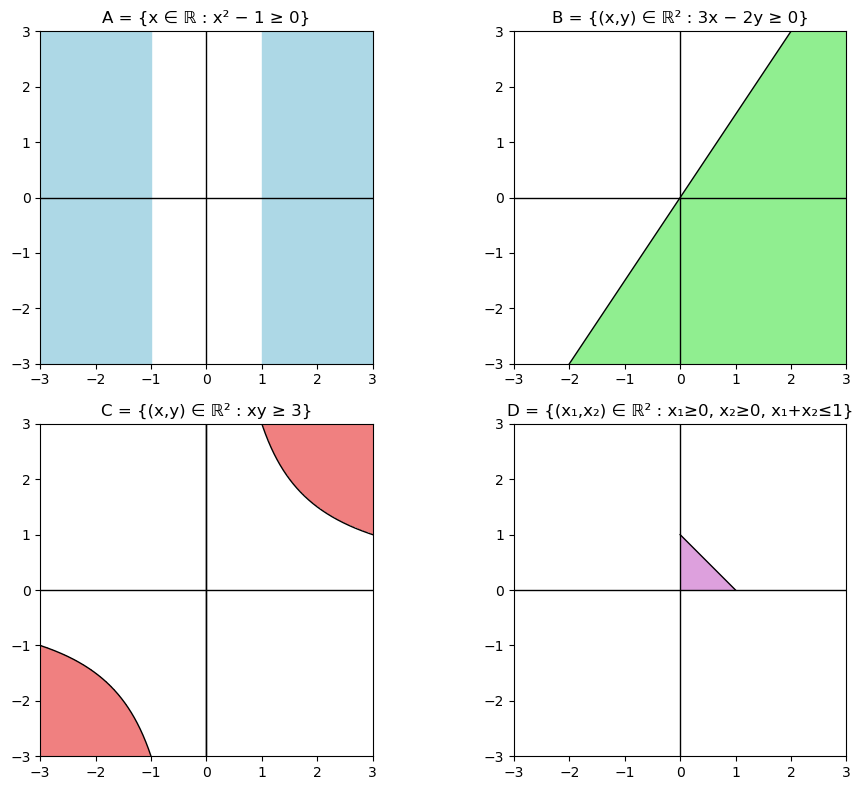

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -3, 3
ymin, ymax = -3, 3
n = 800

x = np.linspace(xmin, xmax, n)
y = np.linspace(ymin, ymax, n)
X, Y = np.meshgrid(x, y)

with np.errstate(divide='ignore', invalid='ignore'):
    maskC = ((X > 0) & (Y >= 3/X)) | ((X < 0) & (Y <= 3/X))
maskB = (3*X - 2*Y >= 0)
maskD = (X >= 0) & (Y >= 0) & (X + Y <= 1)

def shade(ax, mask, color):
    Z = np.zeros_like(mask, dtype=float)
    Z[mask] = 1.0
    ax.imshow(Z, origin='lower', extent=[xmin, xmax, ymin, ymax],
              cmap=plt.matplotlib.colors.ListedColormap(['white', color]),
              vmin=0, vmax=1, interpolation='nearest')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

ax = axes[0, 0]
ax.axvspan(xmin, -1, color='lightblue')
ax.axvspan(1, xmax, color='lightblue')
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('A = {x ∈ ℝ : x² − 1 ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[0, 1]
shade(ax, maskB, 'lightgreen')
ax.plot(x, (3/2)*x, 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('B = {(x,y) ∈ ℝ² : 3x − 2y ≥ 0}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 0]
shade(ax, maskC, 'lightcoral')
ax.plot(x[x!=0], 3/x[x!=0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('C = {(x,y) ∈ ℝ² : xy ≥ 3}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

ax = axes[1, 1]
shade(ax, maskD, 'plum')
ax.plot([0,1],[1,0], 'k', lw=1)
ax.axhline(0, color='black', lw=1)
ax.axvline(0, color='black', lw=1)
ax.set_title('D = {(x₁,x₂) ∈ ℝ² : x₁≥0, x₂≥0, x₁+x₂≤1}')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


For \( A = \{1, 2, 3\} \):

$$
\mathcal{P}(A) = \{ \varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\} \}
$$

There are \( 2^3 = 8 \) subsets in total.

## 2. Probability Space Basics

### Rolling a single fair three-sided die

**Sample space**  
$S = \{1, 2, 3\}$

**Number of outcomes**  
$n(S) = 3$

**Probability of each outcome**  
Since the die is fair:
$$
P(1) = P(2) = P(3) = \frac{1}{3}
$$

**Set of all events**  
The power set:
$$
\mathcal{P}(S) = \{\varnothing, \{1\}, \{2\}, \{3\}, \{1,2\}, \{1,3\}, \{2,3\}, \{1,2,3\}\}
$$
There are $2^3 = 8$ possible events in total.

---

### Rolling a fair three-sided die twice

**Sample space**
$$
S = \{(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3)\}
$$

**Number of outcomes**  
$$
n(S) = 3^2 = 9
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{9}$.

**Set of all events**  
The power set has $2^9 = 512$ possible events.

---

### Flipping a fair coin twice

**Sample space**
$$
S = \{\text{HH}, \text{HT}, \text{TH}, \text{TT}\}
$$

**Number of outcomes**  
$$
n(S) = 4
$$

**Probability of each outcome**  
Each outcome has probability $\frac{1}{4}$.

**Set of all events**  
There are $2^4 = 16$ possible events.

---

### Rolling the three-sided die twice and adding the results

**Possible sums**  
$$
\{2, 3, 4, 5, 6\}
$$

| Sum | Outcomes             | Count | Probability |
|:---:|----------------------|:-----:|:-----------:|
|  2  | (1,1)                |   1   | $\frac{1}{9}$ |
|  3  | (1,2), (2,1)         |   2   | $\frac{2}{9}$ |
|  4  | (1,3), (2,2), (3,1)  |   3   | $\frac{3}{9}$ |
|  5  | (2,3), (3,2)         |   2   | $\frac{2}{9}$ |
|  6  | (3,3)                |   1   | $\frac{1}{9}$ |

**Number of outcomes**  
$$
n(S) = 9
$$

**Number of events**  
$$
2^9 = 512
$$



## 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events?



---

-  Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.

---

- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and describe the space of events. What are the probabilities of the outcomes?

---

Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

---

Single Die – Sample Space & Events

Sample space Ω = {1, 2, 3, 4, 5, 6}

Event space ℱ = power set of Ω (2^6 = 64 events)

P(outcome k) = 1/6 for each k ∈ Ω

P(any event A) = |A| / 6

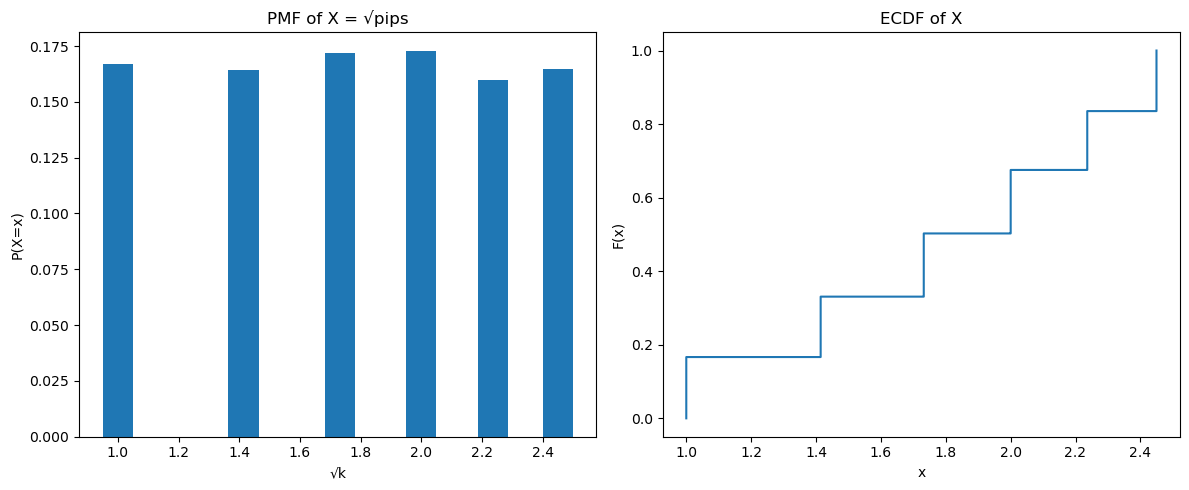

In [3]:
import numpy as np
import matplotlib.pyplot as plt

rolls = np.random.randint(1, 7, size=5000)
X = np.sqrt(rolls)

# PMF
unique, counts = np.unique(X, return_counts=True)
pmf = counts / len(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(unique, pmf, width=0.1)
plt.title('PMF of X = √pips')
plt.xlabel('√k')
plt.ylabel('P(X=x)')

# ECDF
sorted_X = np.sort(X)
ecdf = np.arange(1, len(sorted_X)+1) / len(sorted_X)

plt.subplot(1, 2, 2)
plt.step(sorted_X, ecdf, where='post')
plt.title('ECDF of X')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.tight_layout()
plt.show()

Two Dice – Sample Space, Events, Probabilities

Sample space Ω = {(i,j) | i,j ∈ {1,…,6}}   →  36 equally likely outcomes

Event space ℱ = power set of Ω (2^36 events)

Outcomes of the sum S = i+j → {2,3,…,12}

P(S=k) = number of ways to get k divided by 36

The probability distribution for sums:

Sum	Ways	Probability<br>
2	1	1/36<br>
3	2	2/36<br>
4	3	3/36<br>
5	4	4/36<br>
6	5	5/36<br>
7	6	6/36<br>
8	5	5/36<br>
9	4	4/36<br>
10	3	3/36<br>
11	2	2/36<br>
12	1	1/36<br>

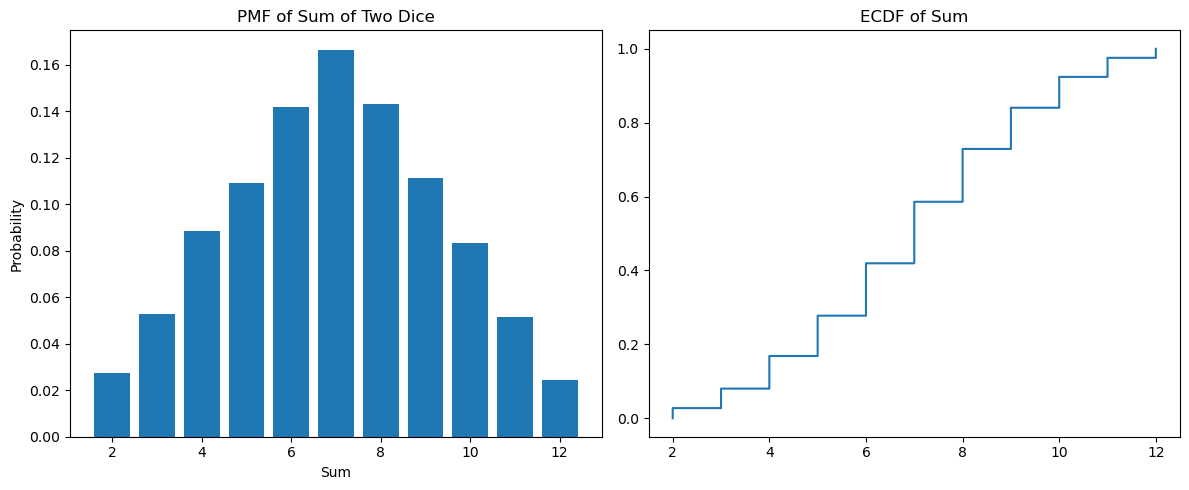

In [4]:
rolls1 = np.random.randint(1, 7, 10000)
rolls2 = np.random.randint(1, 7, 10000)
S = rolls1 + rolls2

# PMF
values, counts = np.unique(S, return_counts=True)
pmf = counts / len(S)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(values, pmf)
plt.title('PMF of Sum of Two Dice')
plt.xlabel('Sum')
plt.ylabel('Probability')

# ECDF
sorted_S = np.sort(S)
ecdf = np.arange(1, len(sorted_S)+1) / len(sorted_S)
plt.subplot(1, 2, 2)
plt.step(sorted_S, ecdf, where='post')
plt.title('ECDF of Sum')
plt.tight_layout()
plt.show()

## 4. Roulette

Done by Caroline, added 10/31 (late)

# Planning/Some Answers: 

a) 

I think a df would be best to model spinning the roulette wheel.
Make the columns green, red, or black.

Actually, this would make a "ragged" dataframe. Use a dict instead.

Put an entry for green : 0 three times to represent that it is a bigger space. (Hopefully I am not overcomplicating this, but bigger space should have bigger probability.)

Randomly sample from that dict.

b) 

Each outcome is defined by landing in a different space - 0, 5, 28, 36, etc. Basically all integers between 0 and 36 inclusive. There are 37 of them.

The 137,438,953,472 (2^37) events are all combinations of these 37 distinct integers. So you can have 0, 0 paired with 1, 0 paired with 1 and 2, etc., and then 1, 1 paired with 2, 1 paired with 2 and 3, etc., doing this for all integers.

Probabilities: Each outcome *should* have equal probability, with the exception of the 0, which I'll say has three times the probability since it is 3 times the size. You can picture a grid with 39 squares. Each integer takes up one square except for 0, which takes up 3 squares. So each integer has 1/39 probability, with the exception of 0, which is 3/39 or 1/13.

c) 

After I run the code to generate a spin, I will map the code to a dict(?) that has results for each spin?? Ok that will be impossible, too many events. Write a function that calculates the 36/K-1 or -1 payout.

d)

Will take another function

e) 

Take average.

In [ ]:
# a)
import numpy as np

roulette_dict = {"green": [0,37,38], # represents the 3 spots that 0 takes up using distinct nubmmers
                 "red": [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],
                 "black": [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]
                 }


def spin_wheel():
    # No seed, to make it truly random
    rng = np.random.default_rng()
    landed = rng.integers(0,39,1)
    for key in roulette_dict:
        for i in range(len(roulette_dict[key])):
            if roulette_dict[key][i] == landed:
                spin_result = key, roulette_dict[key][i]
    return spin_result

print(spin_wheel())

('black', 10)


In [ ]:
def bet_result(bet): # Bet must be given as a list
    spin_result_color = spin_wheel()[0]
    spin_result_number = spin_wheel()[1]
    # Length of the input array, i.e.m how many numbers were guessed
    K = len(bet)
    # Start with no payout
    payout = -1.00
    # For each bet in the input array
    for i in range(0,K):
        # If a number is given
        if type(bet[i]) == int: 
            # If that bet is the spin_result_number
            if bet[i] == spin_result_number:
                payout_option = 36/K - 1
                payout = max(payout_option, payout)
            else:
                payout_option = -1.00
                payout = max(payout_option, payout)
        # If a color is given
        if type(bet[i]) == str:
            # If the color is right
            if bet[i] == spin_result_color:
                payout_option = 36/18 - 1
                payout = max(payout_option, payout)
            else:
                payout_option = -1.00
                payout = max(payout_option, payout)
    return "%.2f" % payout

for i in range(1000):
    red = bet_result(['red'])
    odd = bet_result([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37])
    seven = bet_result([7])   
    split = bet_result([1,2])
    line = bet_result([1,2,3,4,5,6])                  


print(f"Betting on red: ${bet_result(['red'])}")
print(f"Betting on odd: ${bet_result([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37])}")
print(f"Betting on 7: ${bet_result([7])}")
print(f"Betting on a split: ${bet_result([1,2])}")
print(f"Betting on a line: ${bet_result([1,2,3,4,5,6])}")



Betting on red: $-1.00
Betting on odd: $0.89
Betting on 7: $-1.00
Betting on a split: $-1.00
Betting on a line: $-1.00


### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.


HOW TO CHECK IF VALID DISTRIBUTION?? (CDF)

1- Non-decreasing

2- right contiguous

3- satisfies negitive infinity -> 0 and positive infinity -> 1



1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$


In [6]:
pip install scipy

/Users/Caroline/.zshenv:1: no such file or directory: ib/std.jar:/Users/Caroline/lib/dsa.jar
/Users/Caroline/.zshenv:2: no such file or directory: ib/std.jar:/Users/Caroline/lib/dsa.jar
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


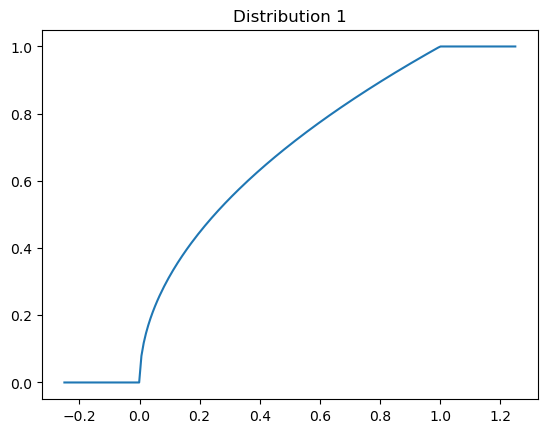

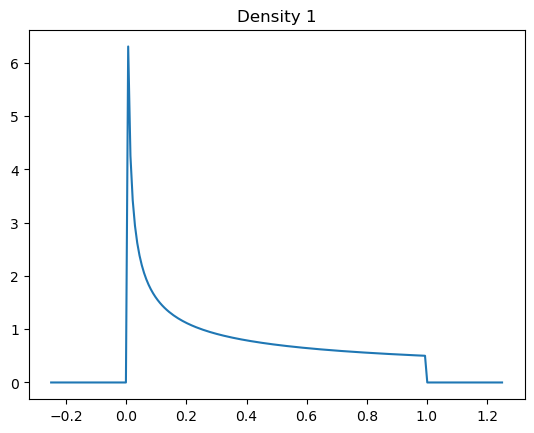

In [7]:
x = np.linspace(-.25, 1.25, 200)
F = []
f = []

for xi in x:
    # CDF
    if xi <= 0:
        F.append(0)
    elif xi >= 1:
        F.append(1)
    else:
        F.append(np.sqrt(xi))
    # PDF
    if 0 < xi < 1:
        f.append(1 / (2 * np.sqrt(xi)))
    else:
        f.append(0)

plt.plot(x, F); plt.title("Distribution 1"); plt.show()
plt.plot(x, f); plt.title("Density 1"); plt.show()


2. $F(x) = \dfrac{1}{1+e^{-x}}$


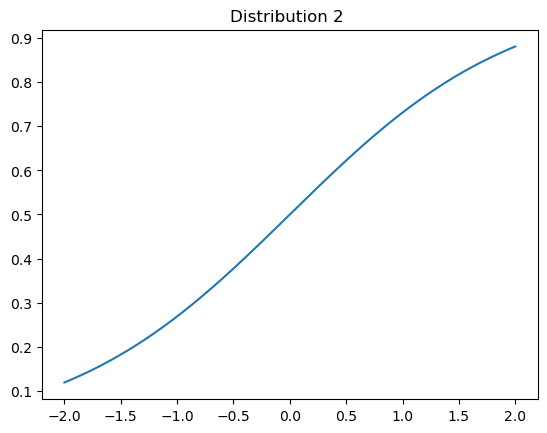

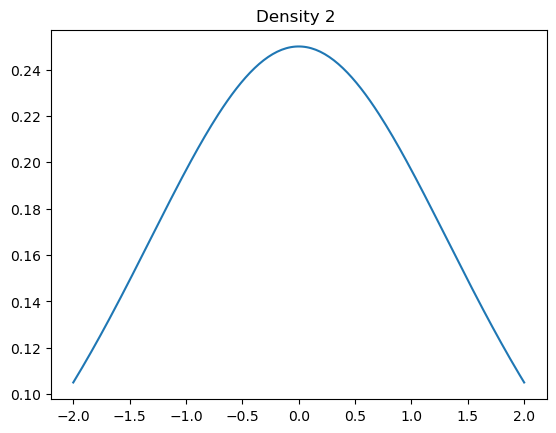

In [8]:
x = np.linspace(-2, 2, 200)
F = 1 / (1 + np.exp(-x))
f = np.exp(-x) / (1 + np.exp(-x))**2

plt.plot(x, F); plt.title("Distribution 2 "); plt.show()
plt.plot(x, f); plt.title("Density 2 "); plt.show()


3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$


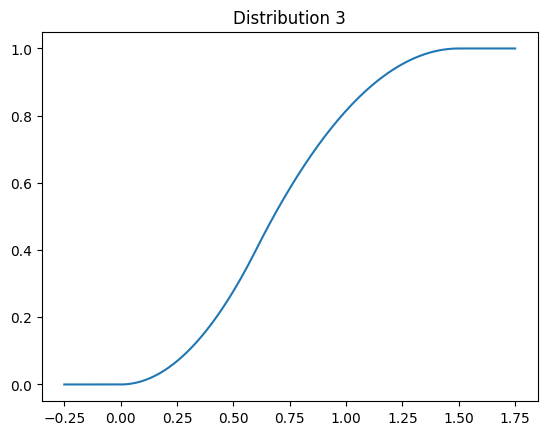

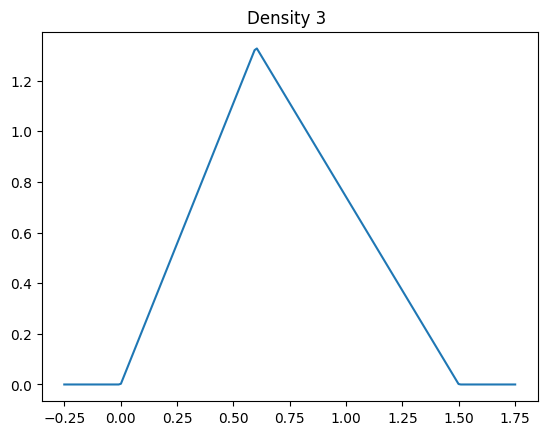

In [ ]:
a= 0
c = 0.6
b=  1.5

x = np.linspace(-0.25, 1.75, 200)
F = []
f = []

for xi in x:
    # CDF
    if xi <= a:
        F.append(0)
    elif a < xi <= c:
        F.append((xi - a)**2 / ((b - a) * (c - a)))
    elif c < xi < b:
        F.append(1 - (b - xi)**2 / ((b - a) * (b - c)))
    else:
        F.append(1)
    # PDF
    if a < xi < c:
        f.append(2 * (xi - a) / ((b - a) * (c - a)))
    elif c < xi < b:
        f.append(2 * (b - xi) / ((b - a) * (b - c)))
    else:
        f.append(0)

plt.plot(x, F); plt.title("Distribution 3"); plt.show()
plt.plot(x, f); plt.title("Density 3 "); plt.show()


4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$


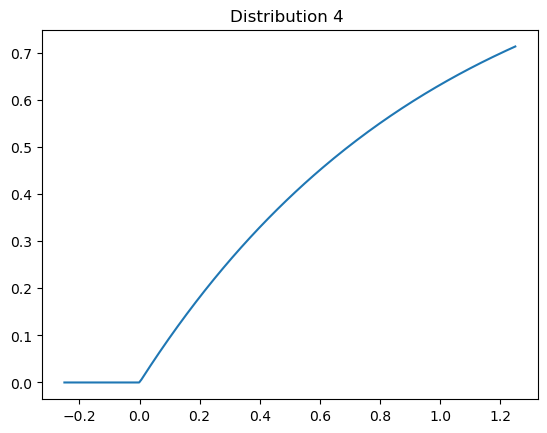

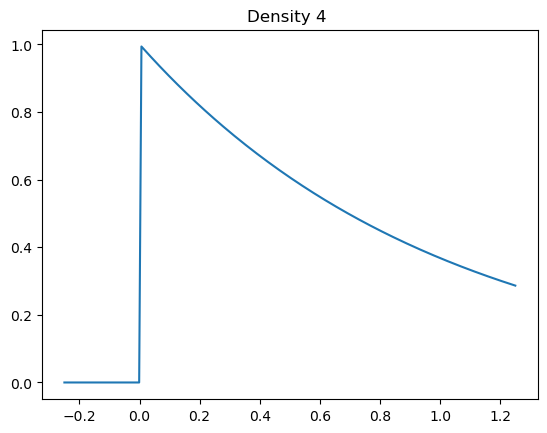

In [9]:
x = np.linspace(-.25, 1.25, 200)
F = [0 if xi < 0 else 1 - np.exp(-xi) for xi in x]
f = [0 if xi < 0 else np.exp(-xi) for xi in x]

plt.plot(x, F); plt.title("Distribution 4 "); plt.show()
plt.plot(x, f); plt.title("Density 4 "); plt.show()


#### what about at 0 ???


5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

The code above also describes the uniform distribution

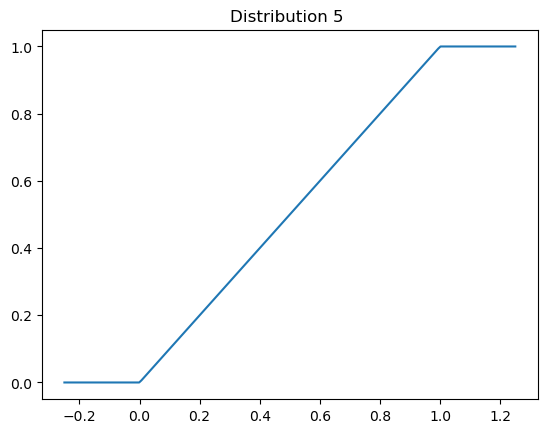

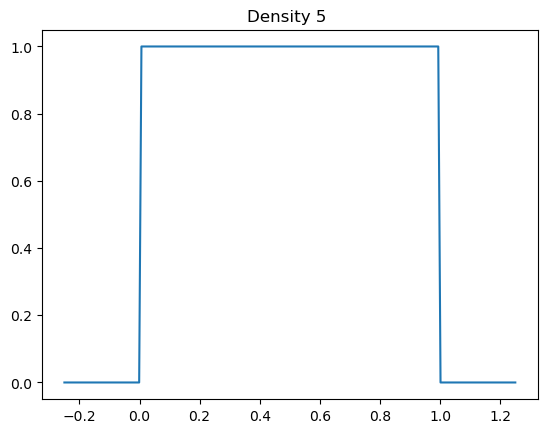

In [10]:
x = np.linspace(-.25, 1.25, 200)
F = [0 if xi <= 0 else (1 if xi >= 1 else xi) for xi in x]
f = [1 if 0 < xi < 1 else 0 for xi in x]

plt.plot(x, F); plt.title("Distribution 5 "); plt.show()
plt.plot(x, f); plt.title("Density 5 "); plt.show()


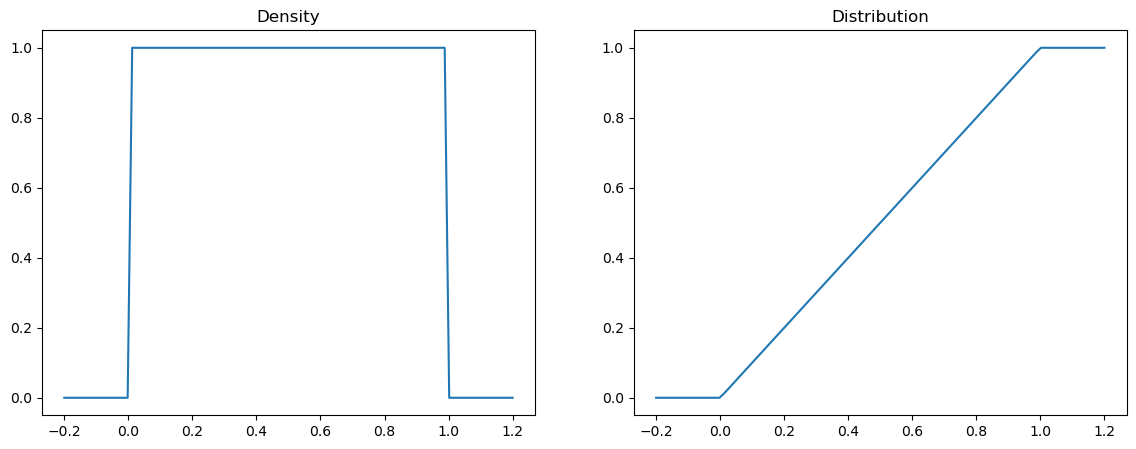

In [11]:
import seaborn as sns
import scipy as sp
#in class code for uniform distribution
grid = np.linspace(-.2,1.2,100)

## Plot the density and distribution
pdf = sp.stats.uniform.pdf(grid)
cdf = sp.stats.uniform.cdf(grid)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x=grid,y=pdf,ax=axes[0])
axes[0].set_title('Density')
sns.lineplot(x=grid,y=cdf,ax=axes[1])
axes[1].set_title('Distribution')
plt.show()

They are all distribution functions.

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


# Setup

In [12]:
import numpy as np
from scipy.stats import logistic, expon, nbinom
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
metabric_df = pd.read_csv('data/metabric.csv')
metabric_df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
# Logistic distribution

The support of the logistic distribution is from -∞ to ∞ as there is no value where $e^{(-x/\theta)}$ is less than 0. Therefore, the support is all real numbers.

Derivative:
$$F(x) = \frac{1}{1 + e^{-(x-mu)/s}}$$
$$F(x) = (1 + e^{-(x-\mu)/s})^{-1}$$
$$F'(x) = -(1 + e^{-(x-mu)/s})^{-2} \cdot \frac{d}{dx}[1 + e^{-(x-mu)/s}]$$
$$\frac{d}{dx}[e^{-(x-mu)/s}] = e^{-(x-mu)/s} \cdot \left(-\frac{1}{s}\right)$$
$$F'(x) = -(1 + e^{-(x-mu)/s})^{-2} \cdot \left(-\frac{1}{s}\right) \cdot e^{-(x-mu)/s}$$
$$F'(x) = \frac{e^{-(x-mu)/s}}{s(1 + e^{-(x-mu)/s})^2}$$

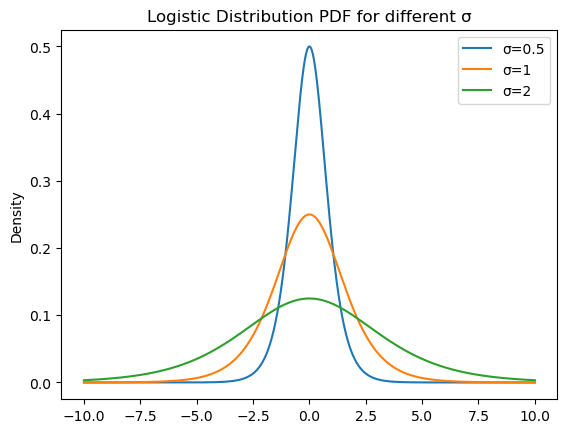

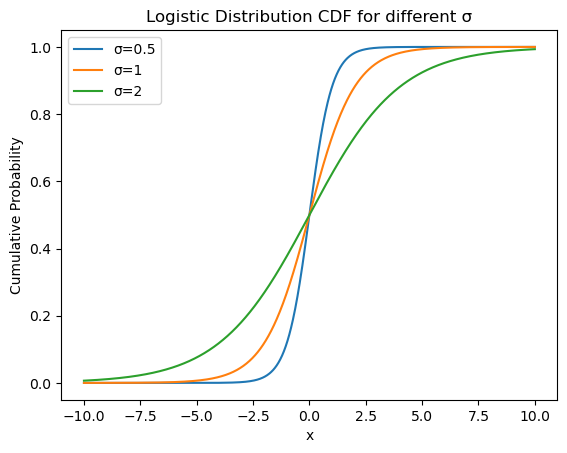

In [14]:
sigmas = [0.5, 1, 2]
support = np.linspace(-10, 10, 1000)
for s in sigmas:
    pdf = logistic.pdf(support, loc=0, scale=s)
    plt.plot(support, pdf, label=f'σ={s}')
plt.title('Logistic Distribution PDF for different σ')
plt.ylabel('Density')
plt.legend()
plt.show()

for s in sigmas:
    cdf = logistic.cdf(support, loc=0, scale=s)
    plt.plot(support, cdf, label=f'σ={s}')
plt.title('Logistic Distribution CDF for different σ')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

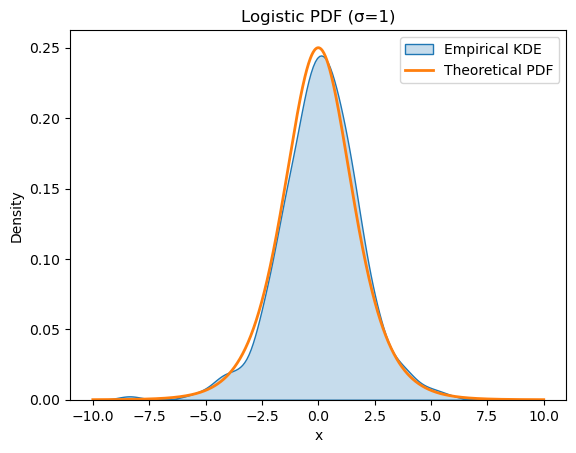

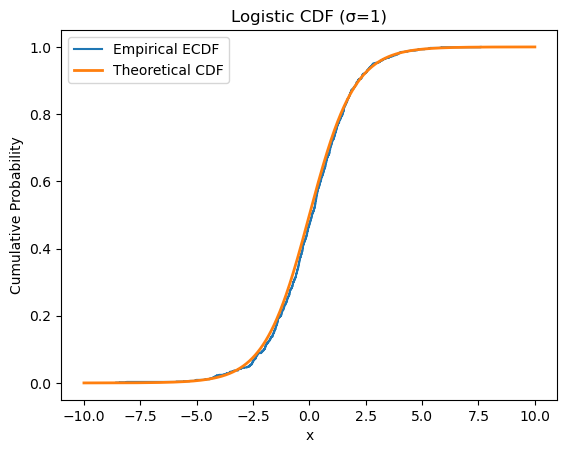

In [15]:
sigma = 1
n = 1000
rng = np.random.default_rng(0)
sample = logistic.rvs(loc=0, scale=sigma, size=n, random_state=rng)

sns.kdeplot(sample, label='Empirical KDE', fill=True)
plt.plot(support, logistic.pdf(support, loc=0, scale=sigma), color='C1', lw=2, label='Theoretical PDF')
plt.title(f'Logistic PDF (σ={sigma})')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


x_sorted = np.sort(sample)
y_ecdf = np.arange(1, n+1) / n
plt.step(x_sorted, y_ecdf, where='post', label='Empirical ECDF')
plt.plot(support, logistic.cdf(support, loc=0, scale=sigma), color='C1', lw=2, label='Theoretical CDF')
plt.title(f'Logistic CDF (σ={sigma})')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In the metabric dataset, the Age at Diagnosis variable very loosly follows the logistic probability density function

# Exponential distribution

The exponential distribution function has support in the range (0 to $\infty$)

Derivative:
$$F(x) = 1 - e^{-\lambda x} \text{ for } x \geq 0$$
$$F'(x) = \frac{d}{dx}[1 - e^{-\lambda x}]$$

$$F'(x) = 0 - e^{-\lambda x} \cdot (-\lambda)$$

$$F'(x) = \lambda e^{-\lambda x}$$

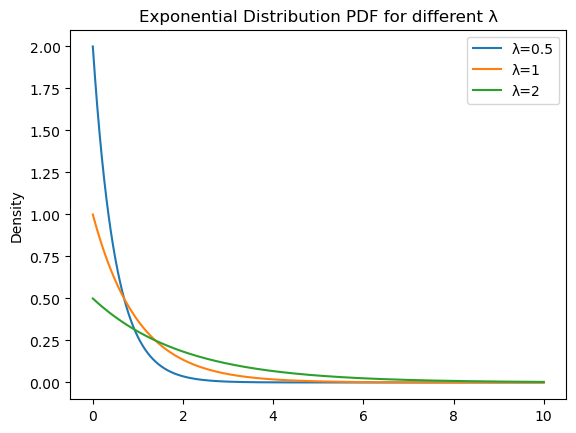

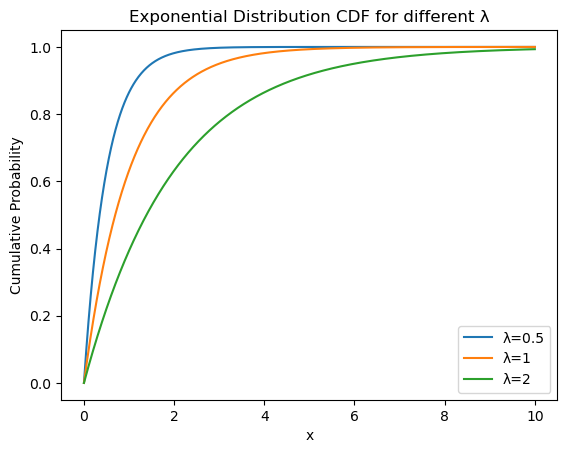

In [16]:
v_lambda = [0.5, 1, 2]
support = np.linspace(0, 10, 1000)
for s in v_lambda:
    pdf = expon.pdf(support, loc=0, scale=s)
    plt.plot(support, pdf, label=f'λ={s}')
plt.title('Exponential Distribution PDF for different λ')
plt.ylabel('Density')
plt.legend()
plt.show()

for s in v_lambda:
    cdf = expon.cdf(support, loc=0, scale=s)
    plt.plot(support, cdf, label=f'λ={s}')
plt.title('Exponential Distribution CDF for different λ')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

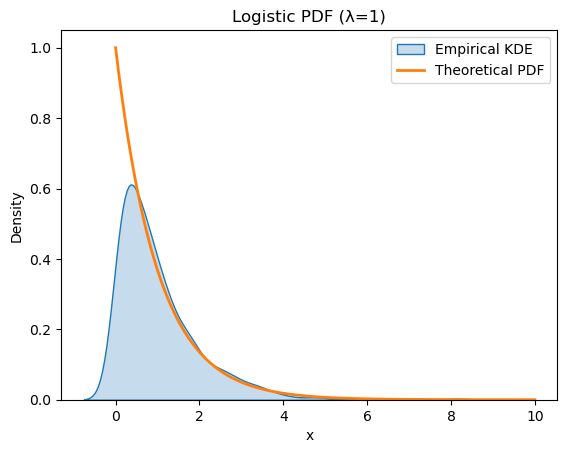

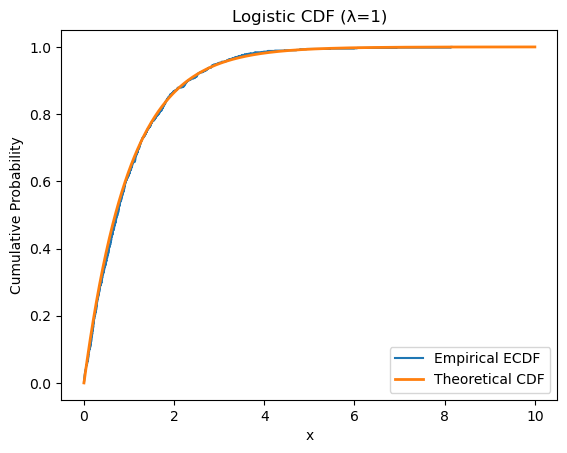

In [17]:
v_lambda_const = 1
n = 1000
rng = np.random.default_rng(0)
sample = expon.rvs(loc=0, scale=v_lambda_const, size=n, random_state=rng)

sns.kdeplot(sample, label='Empirical KDE', fill=True)
plt.plot(support, expon.pdf(support, loc=0, scale=v_lambda_const), color='C1', lw=2, label='Theoretical PDF')
plt.title(f'Logistic PDF (λ={v_lambda_const})')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


x_sorted = np.sort(sample)
y_ecdf = np.arange(1, n+1) / n
plt.step(x_sorted, y_ecdf, where='post', label='Empirical ECDF')
plt.plot(support, expon.cdf(support, loc=0, scale=v_lambda_const), color='C1', lw=2, label='Theoretical CDF')
plt.title(f'Logistic CDF (λ={v_lambda_const})')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In the metabrics data, the distribution of lymph nodes examined positive roughly follows the exponential PDF.

### Negative Binomial distribution

The negative binomial distribution has support for all discrete integers >= 0.

Derivative:

**PMF**: $P(X = k) = \binom{k + r - 1}{k} p^r (1-p)^k \text{ for } k = 0, 1, 2, \ldots$

**CDF**: $F(k) = P(X \leq k) = \sum_{i=0}^{\lfloor k \rfloor} \binom{i + r - 1}{i} p^r (1-p)^i$

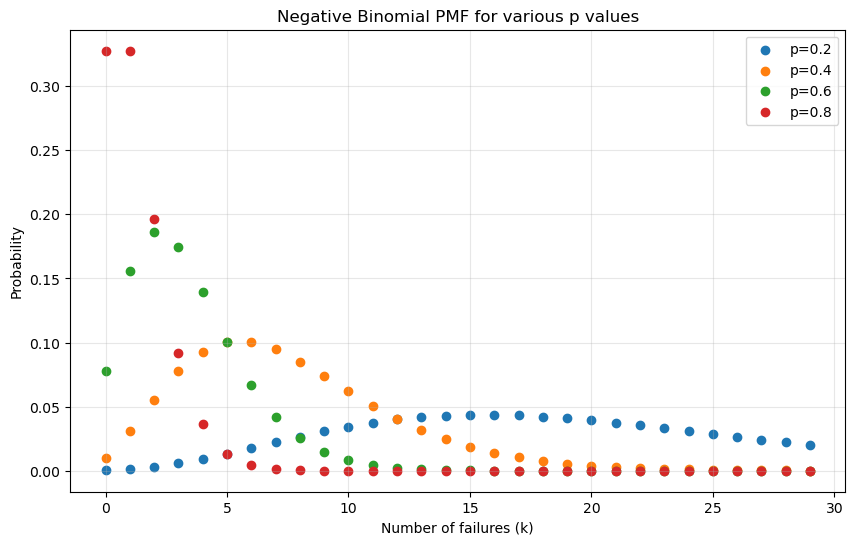

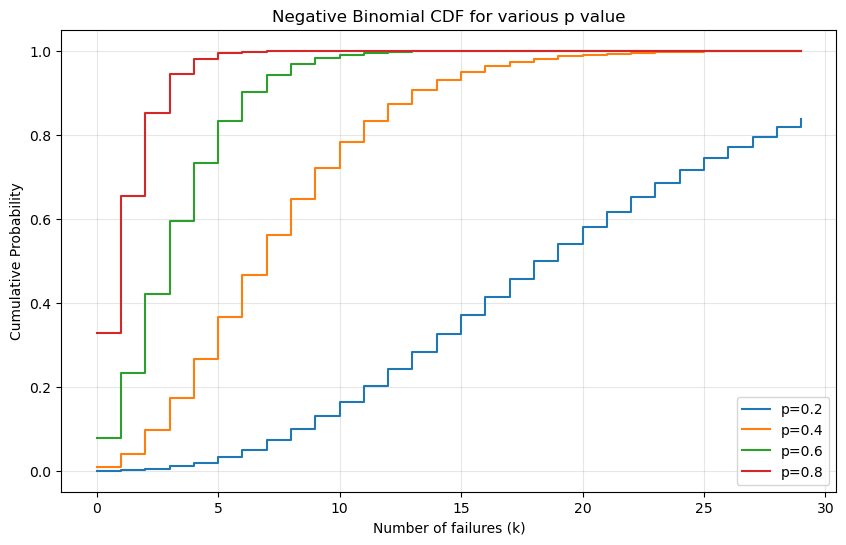

In [18]:
# Set parameters
n = 5  # number of successes
p_values = [0.2, 0.4, 0.6, 0.8]  # different probability values to try
x = np.arange(0, 30)  # number of failures

# Plot PMF for different p values
plt.figure(figsize=(10, 6))
for p in p_values:
    pmf = nbinom.pmf(x, n, p)
    plt.scatter(x, pmf, marker='o', label=f'p={p}')

plt.xlabel('Number of failures (k)')
plt.ylabel('Probability')
plt.title(f'Negative Binomial PMF for various p values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot CDF for different p values
plt.figure(figsize=(10, 6))
for p in p_values:
    cdf = nbinom.cdf(x, n, p)
    plt.step(x, cdf, where='post', label=f'p={p}')

plt.xlabel('Number of failures (k)')
plt.ylabel('Cumulative Probability')
plt.title(f'Negative Binomial CDF for various p value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

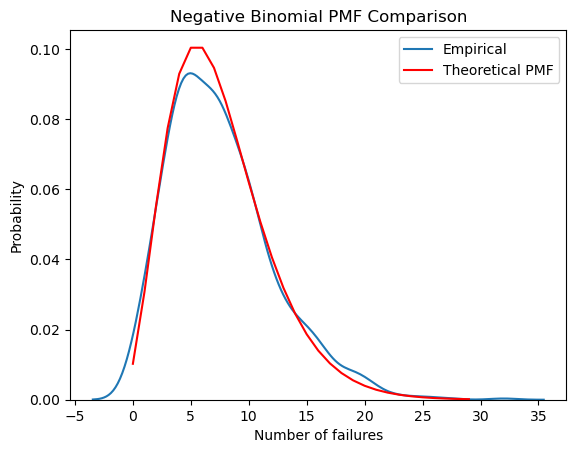

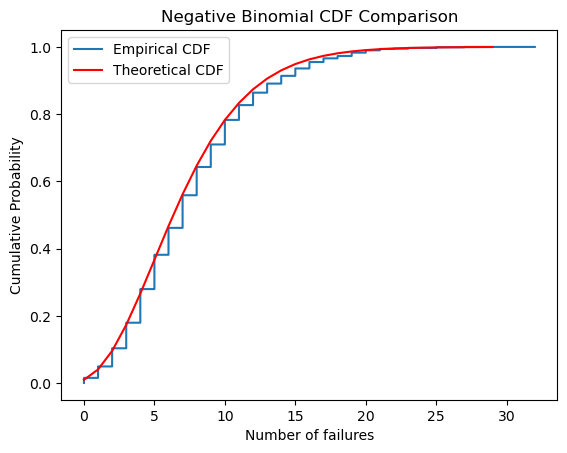

In [19]:
n = 5
p = 0.4
sample_size = 1000
rng = np.random.default_rng(0)
sample = nbinom.rvs(n, p, size=sample_size, random_state=rng)

x = np.arange(0, 30)
theoretical_pmf = nbinom.pmf(x, n, p)
sns.kdeplot(sample, label='Empirical')
plt.plot(x, theoretical_pmf, 'r-', label='Theoretical PMF')
plt.title('Negative Binomial PMF Comparison')
plt.xlabel('Number of failures')
plt.ylabel('Probability')
plt.legend()
plt.show()

x_sorted = np.sort(sample)
y_ecdf = np.arange(1, len(sample) + 1) / len(sample)
theoretical_cdf = nbinom.cdf(x, n, p)
plt.step(x_sorted, y_ecdf, label='Empirical CDF')
plt.plot(x, theoretical_cdf, 'r-', label='Theoretical CDF')
plt.title('Negative Binomial CDF Comparison')
plt.xlabel('Number of failures')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

A metabrics dataset variable which follows the negative binomial distribution is the tumor stage distribution. It is a discrete stage, and the chances the tumor makes it to stage 5 without being intercepted and then killed by the immune system is what is causing the distribution.

### Categorial distribution

The categorical distribution supports discrete integer values from 1 to K.

Derivative equivalent: 

**PMF**: $P(X = k) = p_k \text{ for } k = 1, 2, \ldots, K \text{ where } \sum_{k=1}^{K} p_k = 1$

**CDF**: $F(k) = P(X \leq k) = \sum_{i=1}^{k} p_i$

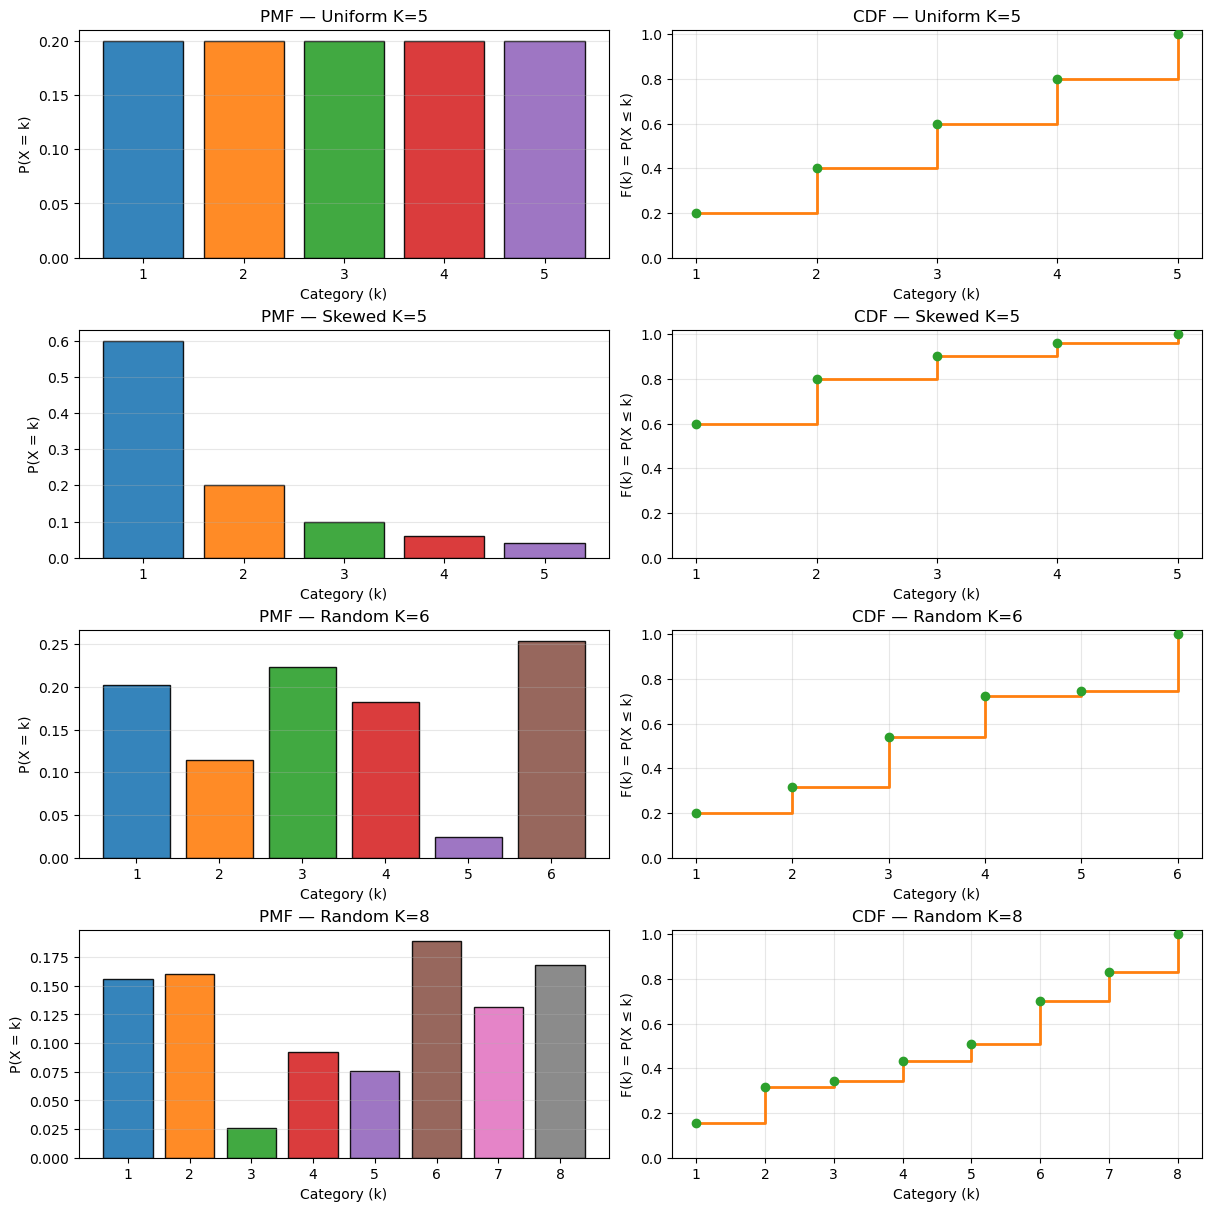

In [22]:
rng = np.random.default_rng(42)

# Define several categorical parameter sets (each is a probability vector summing to 1)
cat_params = {
    "Uniform K=5": np.ones(5) / 5,
    "Skewed K=5": np.array([0.6, 0.2, 0.1, 0.06, 0.04]),
    "Random K=6": (lambda p: p / p.sum())(rng.random(6)),
    "Random K=8": (lambda p: p / p.sum())(rng.random(8)),
}

n_rows = len(cat_params)
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 3 * n_rows), constrained_layout=True)

if n_rows == 1:
    axes = np.array([axes])  # make indexing consistent

palette = sns.color_palette("tab10")

for (title, probs), ax_row in zip(cat_params.items(), axes):
    K = len(probs)
    cats = np.arange(1, K + 1)

    # PMF (bar plot)
    ax_pmf = ax_row[0]
    ax_pmf.bar(cats, probs, color=palette[:K], edgecolor="k", alpha=0.9)
    ax_pmf.set_xticks(cats)
    ax_pmf.set_xlabel("Category (k)")
    ax_pmf.set_ylabel("P(X = k)")
    ax_pmf.set_title(f"PMF — {title}")
    ax_pmf.grid(axis="y", alpha=0.3)

    # CDF (step)
    ax_cdf = ax_row[1]
    cdf = np.cumsum(probs)
    ax_cdf.step(cats, cdf, where="post", lw=2, color=palette[1])
    # also mark discrete jumps
    ax_cdf.scatter(cats, cdf, color=palette[2], zorder=5)
    ax_cdf.set_xticks(cats)
    ax_cdf.set_ylim(0, 1.02)
    ax_cdf.set_xlabel("Category (k)")
    ax_cdf.set_ylabel("F(k) = P(X ≤ k)")
    ax_cdf.set_title(f"CDF — {title}")
    ax_cdf.grid(alpha=0.3)

plt.show()

## Metabric data analysis

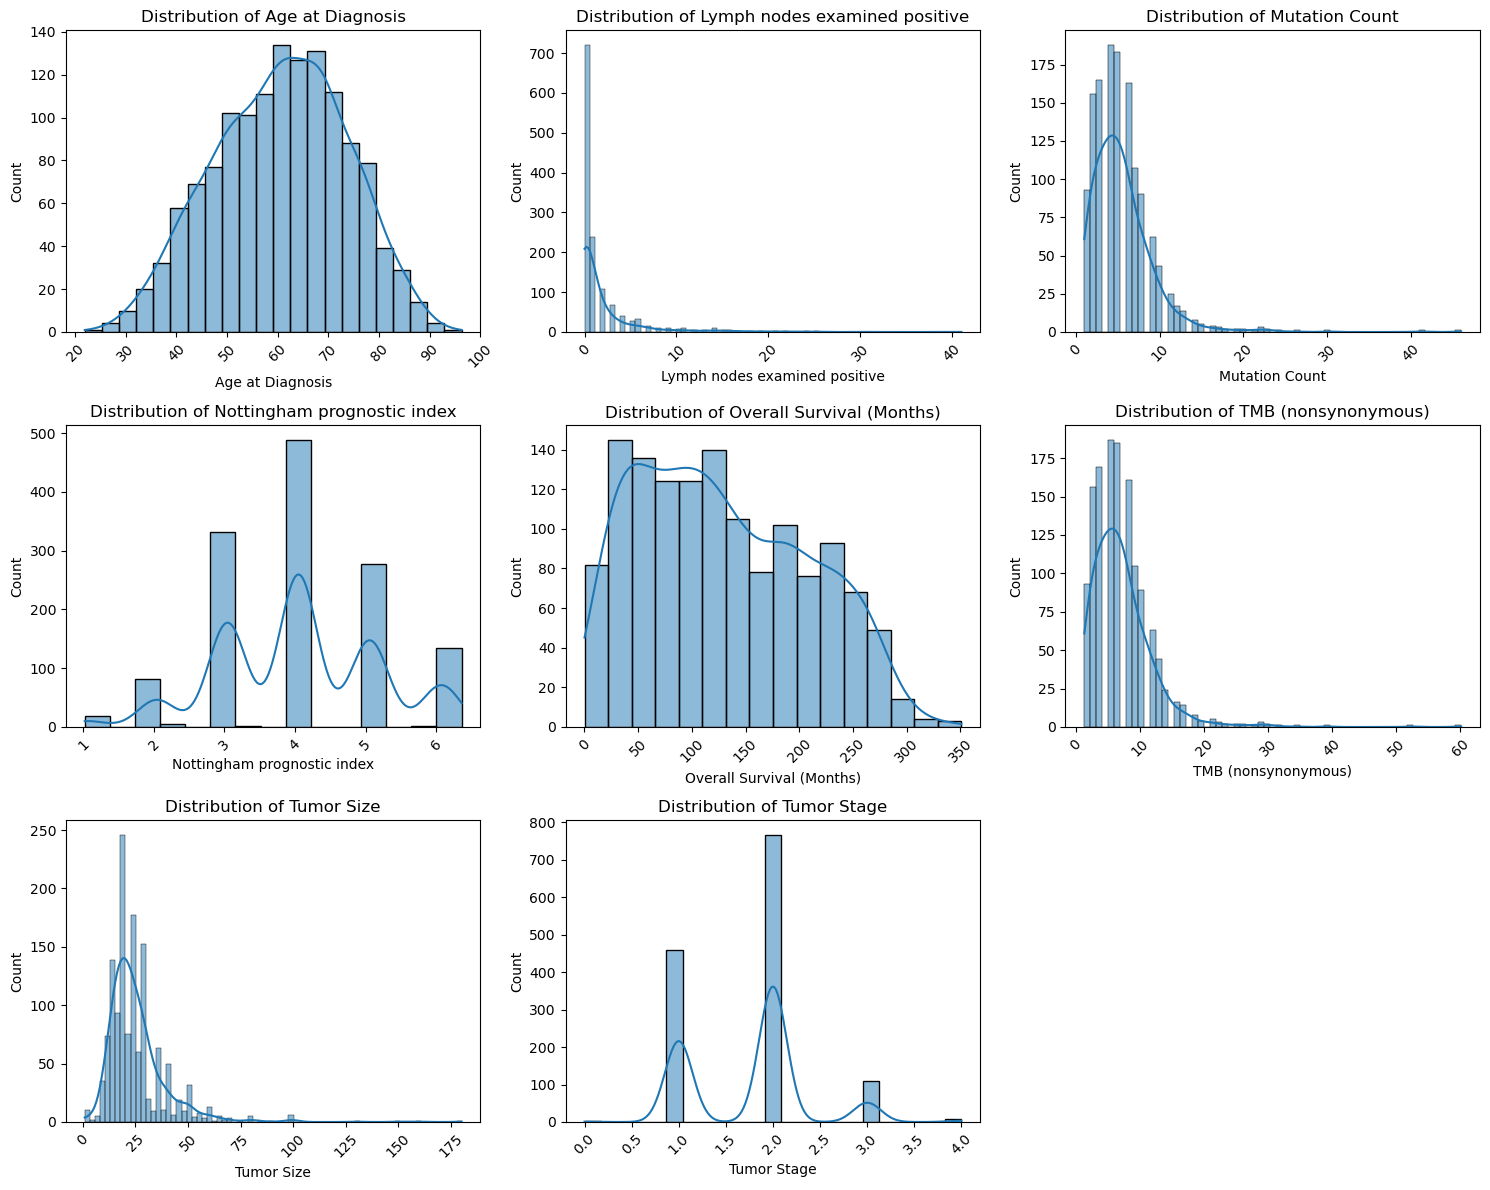

In [ ]:
# Get numerical columns
numerical_cols = metabric_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for each numerical column
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate needed rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()  # Flatten axes array for easier indexing

for idx, col in enumerate(numerical_cols):
    # Create histogram with KDE
    sns.histplot(data=metabric_df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Another approach to Q6

### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


1. Determining the support
    - **Logistic Distrbution (similar to normal)**
        The logistic distribution models probabilities across continuous variables. It can take both negative and positive values, representing deviations or errors around a mean—for example, heights or test scores centered around the average.
        So, the support for this distribtuion is x ∈ (-∞,∞)
    - **Exponential distribution (similar to log-normal)**  
        The exponential distribution measures the time between two events. Time can’t be negative but can start at 0 and, in theory, extend to infinity.
        So, the support for this ditribution is x ∈ (0,∞)
    - **Negative Binomial (Similar to Poisson)**  
        This distribution models the number of failures before the rth success. Since zero failures are possible (if the first trials are successful), the support starts at 0 and goes to infinity. 
        So, the support for this distribution is k ∈ {0,1,2,3,...}
    - **Categorical distribution**  
        It models outcomes that belong to a fixed set of categories (like A, B, C or class labels 1, 2, 3, …).
        So, the support for this distribution is {1,2,...,K} or category labels

Compute the density from the distribution for the logistic and exponential distributions (take a derivative)

Link to the deriving PDF from logistic distribution and Exponential distribution {CDF}: https://docs.google.com/document/d/17kRUsoTjPnoGikEApcjVZ2lg_l58EmGLRWDKTMqyc2Q/edit?usp=sharing

Plotting the density and distribution for a variety of parameter values



In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic, expon


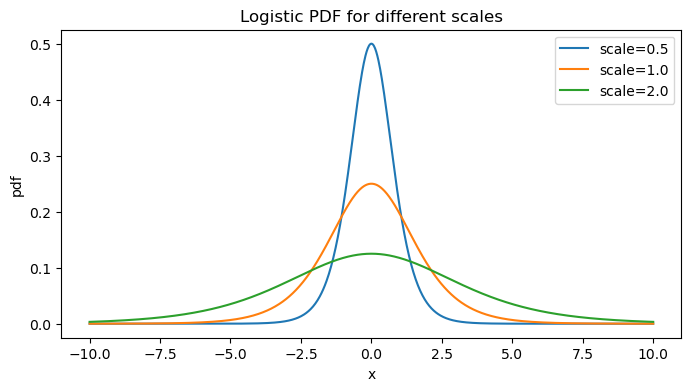

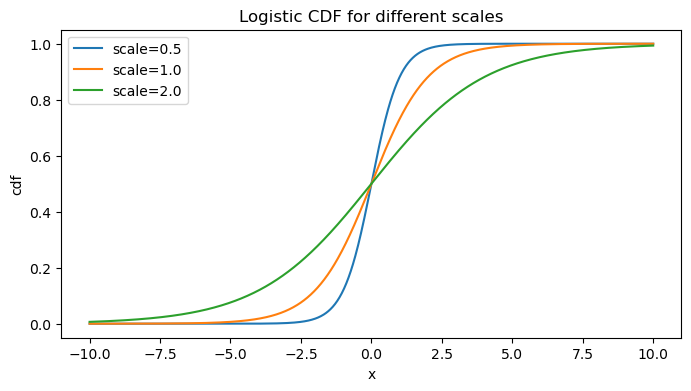

In [25]:
#Logistic Distribution
mean = [0]
scales = [0.5, 1.0, 2.0]
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(8, 4))

#Plotting for different scale parameters
for s in scales:
    plt.plot(x, logistic.pdf(x, loc=mean, scale=s), label=f'scale={s}')

plt.title('Logistic PDF for different scales')
plt.xlabel('x'); plt.ylabel('pdf')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for s in scales:
    plt.plot(x, logistic.cdf(x, loc=mean, scale=s), label=f'scale={s}')
    
plt.title('Logistic CDF for different scales')
plt.xlabel('x'); plt.ylabel('cdf')
plt.legend()
plt.show()

PDF: When the scale increases, the curve spreads out and the peak gets lower. When the scale decreases, the curve becomes narrower and taller.

CDF: Larger scale values make the curve rise more gradually, while smaller scale values make it steeper around 0. All CDFs intersect at the location parameter, which is 0 here.

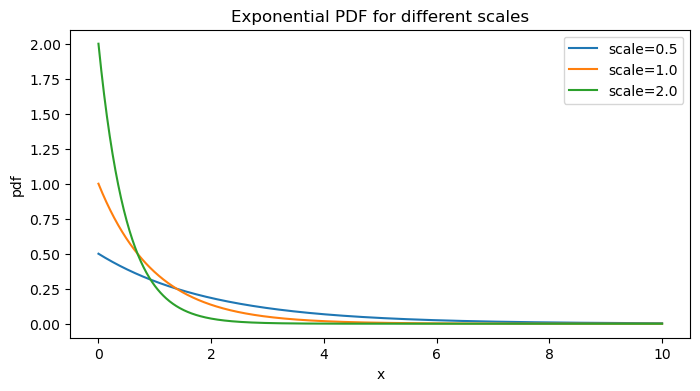

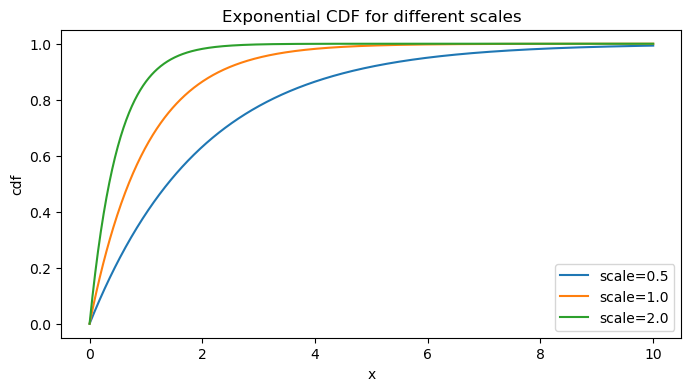

In [26]:
#Exponential Distribution
mean = 0
lambdas = [0.5, 1.0, 2.0]
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(8, 4))

#Plotting for different scale parameters
for lam in lambdas:
    plt.plot(x, expon.pdf(x, loc=mean, scale=1/lam), label=f'scale={lam}')

plt.title('Exponential PDF for different scales')
plt.xlabel('x'); plt.ylabel('pdf')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for lam in lambdas:
    plt.plot(x, expon.cdf(x, loc=mean, scale=1/lam), label=f'scale={lam}')
    
plt.title('Exponential CDF for different scales')
plt.xlabel('x'); plt.ylabel('cdf')
plt.legend()
plt.show()

PDF: When lambda is bigger, the PDF drops faster and most values are near 0. 
     When lambda is smaller, the PDF spreads out and larger values are more likely.

CDF: Bigger lamda makes the CDF rise faster toward 1. 
     Smaller lambda makes it rise slowly. 

In [27]:
from scipy.stats import logistic

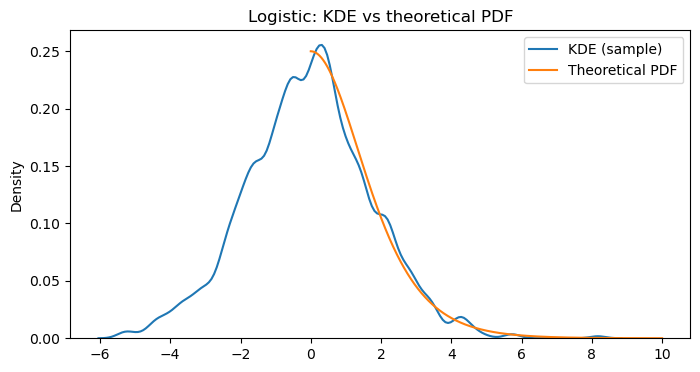

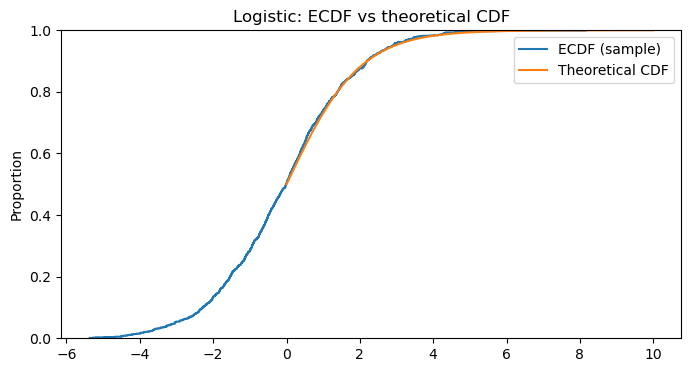

In [28]:
s = 1.0
size = 1000

samples = logistic.rvs(loc=0, scale=s, size=size, random_state=42)

plt.figure(figsize=(8,4))
sns.kdeplot(samples, bw_adjust=0.5, label='KDE (sample)')

plt.plot(x, logistic.pdf(x, loc=0, scale=s), label='Theoretical PDF')
plt.title('Logistic: KDE vs theoretical PDF')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.ecdfplot(samples, label='ECDF (sample)')
plt.plot(x, logistic.cdf(x, loc=0, scale=s), label='Theoretical CDF')
plt.title('Logistic: ECDF vs theoretical CDF')
plt.legend()
plt.show()

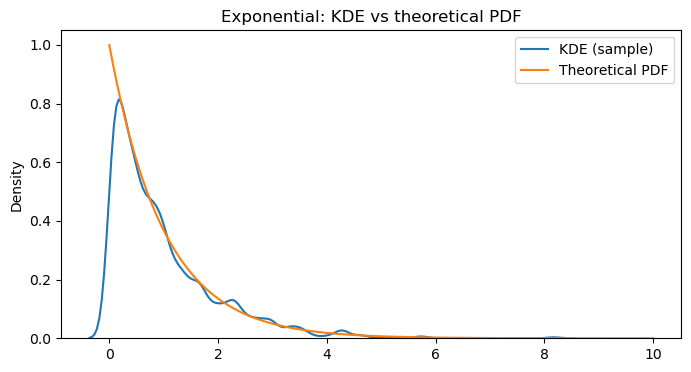

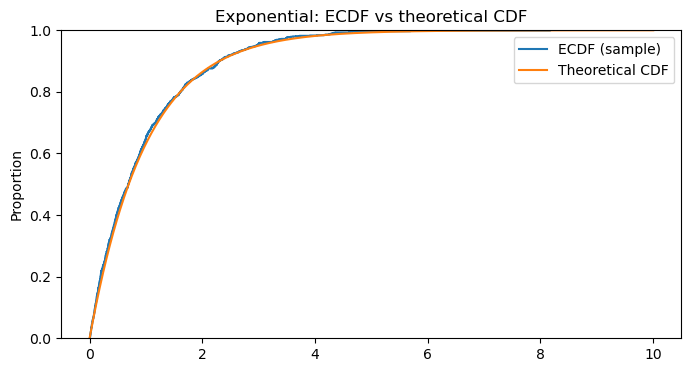

In [29]:
#Exponential distribution
lam = 1.0
samples = expon.rvs(scale=1/lam, size=1000, random_state=42)

plt.figure(figsize=(8,4))
sns.kdeplot(samples, bw_adjust=0.5, label='KDE (sample)')
plt.plot(x, expon.pdf(x, scale=1/lam), label='Theoretical PDF')
plt.title('Exponential: KDE vs theoretical PDF')
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.ecdfplot(samples, label='ECDF (sample)')
plt.plot(x, expon.cdf(x, scale=1/lam), label='Theoretical CDF')
plt.title('Exponential: ECDF vs theoretical CDF')
plt.legend()
plt.show()

Find an example of this general type of PDF/CDF from the Metabric cancer data

In [30]:
import os

os.chdir(r'C:\Users\karina mehta\UVA class\UnderstandingUncertainity\git_practice\Understanding_Repo\data')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\karina mehta\\UVA class\\UnderstandingUncertainity\\git_practice\\Understanding_Repo\\data'

In [32]:
import pandas as pd
df = pd.read_csv('data/metabric.csv')
df.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [33]:
print(df.columns)
df.info()
df.describe()

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Chemotherapy', 'Hormone Therapy', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'Radio Therapy',
       'TMB (nonsynonymous)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age at Diagnosis               1343 non-null   float64
 1   Type of Breast Surgery         1343 non-null   object 
 2   Cancer Type                    1343 non-null   object 
 3   Chemotherapy                   1343 non-null   object 
 4   Hormone Therapy                1343 non-null   object 
 5   Lymph nodes examined positive  1343 non-null   float64
 6   Mutation Count                 1343 non-null   

,Age at Diagnosis,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),TMB (nonsynonymous),Tumor Size,Tumor Stage
count,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.00000
mean,60.598079,1.860015,5.494415,4.040406,129.094291,7.164574,25.787416,1.74758
std,12.966330,3.856951,3.755543,1.126092,78.290236,4.900243,14.754791,0.62094
min,21.930000,0.000000,1.000000,1.020000,0.100000,1.307518,1.000000,0.00000
25%,51.045000,0.000000,3.000000,3.050000,62.700000,3.922553,17.000000,1.00000
50%,61.140000,0.000000,5.000000,4.042000,118.533333,6.537589,22.000000,2.00000
75%,69.815000,2.000000,7.000000,5.040000,191.200000,9.152624,30.000000,2.00000
max,96.290000,41.000000,46.000000,6.360000,351.000000,60.145814,180.000000,4.00000


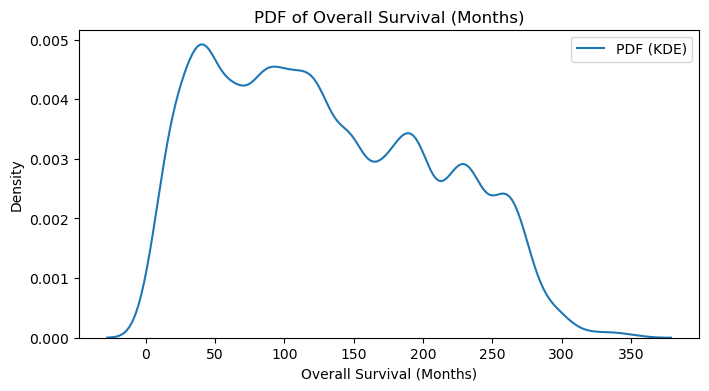

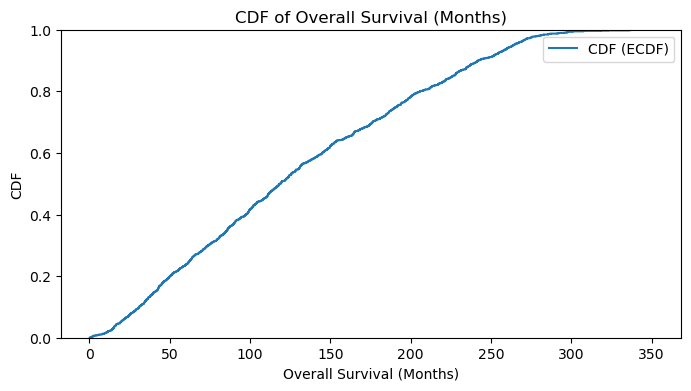

In [34]:
survival_months = df['Overall Survival (Months)']
# PDF
plt.figure(figsize=(8,4))
sns.kdeplot(survival_months, bw_adjust=0.5, label='PDF (KDE)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('Density')
plt.title('PDF of Overall Survival (Months)')
plt.legend()
plt.show()

#CDF
plt.figure(figsize=(8,4))
sns.ecdfplot(survival_months, label='CDF (ECDF)')
plt.xlabel('Overall Survival (Months)')
plt.ylabel('CDF')
plt.title('CDF of Overall Survival (Months)')
plt.legend()
plt.show()

we can examine the Overall Survival (Months) column from the METABRIC breast cancer dataset.  
The distribution of survival times is continuous and non-negative, similar to the exponential distribution. 
By plotting a KDE, we obtain an approximation of the PDF, showing where survival times are most concentrated. 

Similarly, an ECDF provides the CDF, indicating the probability that a patient’s survival is less than or equal to a given time.

 These plots allow us to visually explore the distribution of survival outcomes.